In [9]:
# Part 1
## Step 1: Declare Import variables
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import norm
from scipy.stats import gaussian_kde

In [10]:
# Part 1 
## Step 2: Set up N = 10000 and s = 1.
N = 10000
s = 1

In [11]:
# Part 1
## Step 3: Set up the formula accordingly 
def f(x):
    return 0.5 * np.exp(-np.abs(x))

In [12]:
# Part 1
## Step 4: Repeat the procedure for i = 1 to N to generate N samples
        
def random_walk_metropolis(N, s):
    samples = np.zeros(N)
    current_value = 0  # Initial value

    for i in range(1, N):
        # Simulate a random number from the Normal distribution
        proposal = np.random.normal(current_value, s)

        # Compute the ratio
        ratio = f(proposal) / f(current_value)

        # Generate a random number from the uniform distribution
        u = np.random.uniform(0, 1)

        # Check the acceptance criterion
        if np.log(u) < np.log(ratio):
            current_value = proposal

        samples[i] = current_value

    return samples

# Generate samples using random walk Metropolis algorithm
samples = random_walk_metropolis(N, s)

In [13]:
# Part 1
## Step 5: Calculate sample mean and standard deviation using generated random number samples
sample_mean = np.mean(samples)
sample_std = np.std(samples)

# Report sample mean and standard deviation
print(f"Sample Mean: {sample_mean}")
print(f"Sample Standard Deviation: {sample_std}")

Sample Mean: 0.03306185404664729
Sample Standard Deviation: 1.4606674050823794


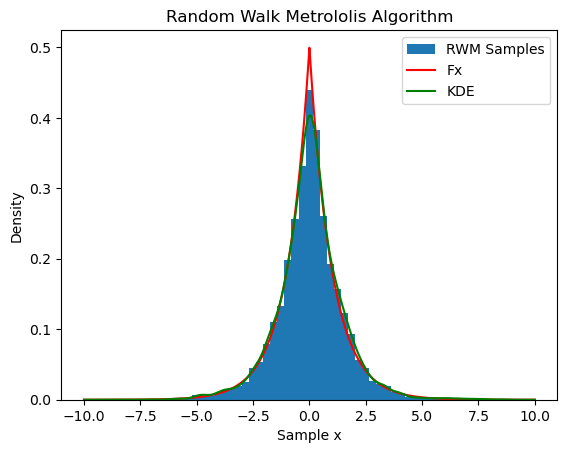

In [14]:
# Part 1
## Step 6: Use the generated samples (x1; : : : xN) to construct a histogram and a kernel density plot for f(x).
# Plot the histogram of generated samples and kernel density plot
plt.hist(samples, bins=50, density=True, label='RWM Samples')
x = np.linspace(-10, 10, 10000)
plt.plot(x, f(x), 'r', label='Fx')

# Kernel density estimation
kde = gaussian_kde(samples)
plt.plot(x, kde(x), 'g', label='KDE')

# Plot settings
plt.legend()
plt.title('Random Walk Metrololis Algorithm')
plt.xlabel('Sample x')
plt.ylabel('Density')

# Show the plot
plt.show()

In [15]:
# Part 2A Define and compute Mj as the sample mean of chain j and Vj as the within sample variance of chain j.
# Part 2B Define and compute the overall within sample variance W
# Part 2C Define and compute the overall sample mean M and the between sample variance B
# Part 2D Compute and define the convergence diagnostics R value 

import numpy as np


# Generate and calculate the initial chain, sample mean and within sample variance
def generate_chain(initial_value, N1, s1):
    return np.cumsum(np.random.normal(loc=s1, size=N1)) + initial_value

def calculate_sample_mean(chain):
    return np.mean(chain)

def calculate_within_sample_variance(chain, sample_mean):
    return np.mean((chain - sample_mean)**2)


# Parameters
J = 4   # Number of chains
N1 = 2000  # Length of each chain
s1 = 0.001  # Standard deviation for random normal values


# Initialize arrays to store sample means, within sample variances, and between sample variances
sample_means = []
within_sample_variances = []
between_sample_variances = []


# Generate and analyze multiple chains
for j in range(1, J+1):
    # Generate chain with a random initial value
    initial_value = np.random.randn()
    chain = generate_chain(initial_value, N1, s1)

    # Calculate sample mean Mj and within sample variance Vj
    Mj = sample_mean = calculate_sample_mean(chain)
    Vj = within_sample_variance = calculate_within_sample_variance(chain, sample_mean)

    # Store Mj and Vj for each chain
    sample_means.append(Mj)
    within_sample_variances.append(Vj)

    # Print results for each chain
    print(f"Chain {j} - Initial Value: {initial_value:.2f}, Sample Mean Mj: {Mj:.2f}, Within Sample Variance Vj: {Vj:.2f}")

    
# Calculate overall within sample variance (W)
W = overall_within_sample_variance = np.mean(within_sample_variances)

# Print overall within sample variance
print(f"\nOverall Within Sample Variance (W): {overall_within_sample_variance:.2f}")


# Calculate overall sample mean (M)
M = overall_sample_mean = np.mean(sample_means)

# Print overall sample mean
print(f"\nOverall Sample Mean (M): {M:.2f}")


# Calculate between sample variance (B)
for j in range(J):
    between_sample_variances.append((sample_means[j] - overall_sample_mean)**2)

# Average the between sample variances B
B =  overall_between_sample_variance = np.mean(between_sample_variances)

# Print overall between sample variance B
print(f"\nOverall Between Sample Variance (B): {B:.2f}")


# Calculate R value
R = np.sqrt((B + W) /W)

print(f"Convergence diagnostics R Value: {R:.2f}")


Chain 1 - Initial Value: 0.20, Sample Mean Mj: 40.26, Within Sample Variance Vj: 136.80
Chain 2 - Initial Value: -1.04, Sample Mean Mj: -16.21, Within Sample Variance Vj: 134.01
Chain 3 - Initial Value: -1.11, Sample Mean Mj: 7.84, Within Sample Variance Vj: 69.15
Chain 4 - Initial Value: -0.64, Sample Mean Mj: 10.91, Within Sample Variance Vj: 273.18

Overall Within Sample Variance (W): 153.28

Overall Sample Mean (M): 10.70

Overall Between Sample Variance (B): 401.52
Convergence diagnostics R Value: 1.90


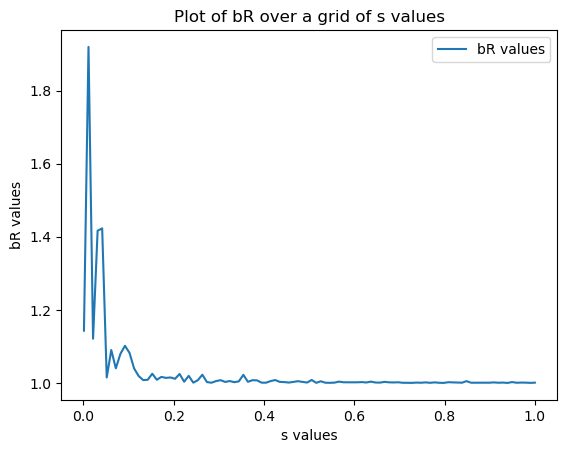

In [16]:
# Part 3 Keeping N1 and J constant, provide a plot of the values of bR over a grid of s values in the interval between 0.001 and 1.

import numpy as np
import matplotlib.pyplot as plt


# Generate and calculate the initial chain, sample mean and within sample variance
def generate_chain(initial_value, N2, s2):
    return np.cumsum(np.random.normal(loc=s2, size=N2)) + initial_value

def calculate_sample_mean(chain):
    return np.mean(chain)

def calculate_within_sample_variance(chain, sample_mean):
    return np.mean((chain - sample_mean)**2)

def calculate_between_sample_variance(sample_means, overall_sample_mean):
    return np.mean((sample_means - overall_sample_mean)**2)


# Use Gelmam Rubin Statistics to obtain the plot of the values of bR over a grid of s values in the interval between 0.001 and 1.
def gelman_rubin_statistic(sample_means, overall_sample_mean, within_sample_variances):
    B2 = calculate_between_sample_variance(sample_means, overall_sample_mean)
    W2 = np.mean(within_sample_variances)
    return np.sqrt((B2 + W2) / W2)


# Parameters J and N2
J = 4   # Number of chains
N2 = 2000  # Length of each chain

# Grid of s2 values
s_values = np.linspace(0.001, 1, 100)


# Initialize an array to store bR values
bR_values = []

# Iterate s2 over s values
for s2 in s_values:
    # Initialize arrays to store sample means and within sample variances
    sample_means = []
    within_sample_variances = []

    # Generate and analyze multiple chains
    for j in range(1, J+1):
        # Generate chain with a random initial value
        initial_value = np.random.randn()
        chain = generate_chain(initial_value, N2, s2)

        # Calculate sample mean and within sample variance
        sample_mean = calculate_sample_mean(chain)
        within_sample_variance = calculate_within_sample_variance(chain, sample_mean)

        # Store sample mean and within sample variance for each chain
        sample_means.append(sample_mean)
        within_sample_variances.append(within_sample_variance)

    # Calculate overall sample mean (M)
    overall_sample_mean = np.mean(sample_means)

    # Calculate bR value
    bR = gelman_rubin_statistic(np.array(sample_means), overall_sample_mean, np.array(within_sample_variances))
    
    # Store and accumulate bR value
    bR_values.append(bR)

    
# Plotting the Gelman Rubin Statistics Graph to show the graph of bR values across the different s values 
plt.plot(s_values, bR_values, label='bR values')
plt.xlabel('s values')
plt.ylabel('bR values')
plt.title('Plot of bR over a grid of s values')
plt.legend()
plt.show()

# The Gelman-Rubin statistic is a ratio, and hence unit free, making it a simple summary for any MCMC sampler. In addition, it can 
# be implemented without first specifying a parameter that is to be estimated, unlike Monte Carlo standard errors. Therefore, it 
# can be a useful tool for monitoring a chain before any specific decisions about what kinds of inferences will be made from the 
# model.